In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv('new_train.csv')
df = pd.DataFrame(train_data)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


### Check data type

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [3]:
df['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [4]:
df[df['y']=='n'] = "no"
df['y'].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  object
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  object
 11  campaign     32950 non-null  object
 12  pdays        32950 non-null  object
 13  previous     32950 non-null  object
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: object(16)
memory usage: 4.0+ MB


### Seperate float64 out from object type

In [6]:
nan_cols = [i for i in df.columns if df[i].isnull().any()]
df[nan_cols].isnull().sum()

Series([], dtype: float64)

In [7]:
dftNumeric = df.select_dtypes(include=['int64', 'float64'])
dftObject = df.select_dtypes(include=['object'])

In [8]:
dftNumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Empty DataFrame


### Check remaining object types

In [9]:
dftObject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  object
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  object
 11  campaign     32950 non-null  object
 12  pdays        32950 non-null  object
 13  previous     32950 non-null  object
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: object(16)
memory usage: 4.0+ MB


### Transforming object into numerical type

In [10]:
dftObjcat = dftObject.columns
for i in dftObjcat:
    print(f'Catagory of {i}')
    catlist = dftObject[i].unique()
    for j, val in enumerate(catlist):
         dftobjfinal = dftObject[i].replace({val:j+1},inplace=True)
         #print(dftobjfinal)
         print(j,val)
    print('--------------------------------')

Catagory of age
0 49
1 37
2 78
3 36
4 59
5 29
6 26
7 30
8 50
9 33
10 44
11 32
12 43
13 56
14 40
15 47
16 34
17 46
18 39
19 41
20 55
21 38
22 63
23 23
24 48
25 53
26 35
27 51
28 71
29 58
30 21
31 45
32 25
33 77
34 28
35 52
36 80
37 57
38 22
39 60
40 27
41 24
42 31
43 42
44 54
45 81
46 64
47 79
48 20
49 76
50 82
51 19
52 68
53 65
54 73
55 66
56 85
57 74
58 61
59 86
60 69
61 18
62 83
63 88
64 70
65 87
66 84
67 75
68 62
69 72
70 67
71 89
72 17
73 91
74 98
--------------------------------
Catagory of job
0 blue-collar
1 entrepreneur
2 retired
3 admin.
4 student
5 services
6 technician
7 self-employed
8 management
9 unemployed
10 unknown
11 housemaid
--------------------------------
Catagory of marital
0 married
1 divorced
2 single
3 unknown
--------------------------------
Catagory of education
0 basic.9y
1 university.degree
2 basic.4y
3 high.school
4 professional.course
5 unknown
6 basic.6y
7 illiterate
--------------------------------
Catagory of default
0 unknown
1 no
2 yes
-------------

In [11]:
dftObject

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,1,1,1,1,1,1,1,1,1,596,12,25,8,1,1
1,2,2,1,2,2,1,1,2,1,1,1375,2,25,8,2,1
2,3,3,1,3,2,1,1,1,2,2,1403,12,25,8,1,2
3,4,4,1,2,2,2,1,2,3,2,696,2,25,8,1,1
4,5,3,2,2,2,1,1,1,4,3,699,2,25,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,35,6,3,4,2,2,1,1,2,3,192,12,25,8,1,1
32946,36,7,1,5,2,2,1,1,1,4,807,12,25,8,2,1
32947,45,4,1,1,2,1,2,1,2,2,110,12,25,8,1,1
32948,6,4,1,2,2,1,1,2,3,4,922,12,25,8,1,1


### Concatinate transformed object to numerical with numerical(initial) 

In [12]:
df_Final = pd.concat([dftObject, dftNumeric], axis=1)
df_Final

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,1,1,1,1,1,1,1,1,1,1,596,12,25,8,1,1
1,2,2,1,2,2,1,1,2,1,1,1375,2,25,8,2,1
2,3,3,1,3,2,1,1,1,2,2,1403,12,25,8,1,2
3,4,4,1,2,2,2,1,2,3,2,696,2,25,8,1,1
4,5,3,2,2,2,1,1,1,4,3,699,2,25,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,35,6,3,4,2,2,1,1,2,3,192,12,25,8,1,1
32946,36,7,1,5,2,2,1,1,1,4,807,12,25,8,2,1
32947,45,4,1,1,2,1,2,1,2,2,110,12,25,8,1,1
32948,6,4,1,2,2,1,1,2,3,4,922,12,25,8,1,1


In [13]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df_Final)

In [14]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score

# threshold = -1.5
threshold2 = -1.5
filtre2 = outlier_score["score"] < threshold2
outlier_index = outlier_score[filtre2].index.tolist()

In [15]:
len(outlier_index)

1208

In [16]:
df_Final.drop(outlier_index, inplace=True)

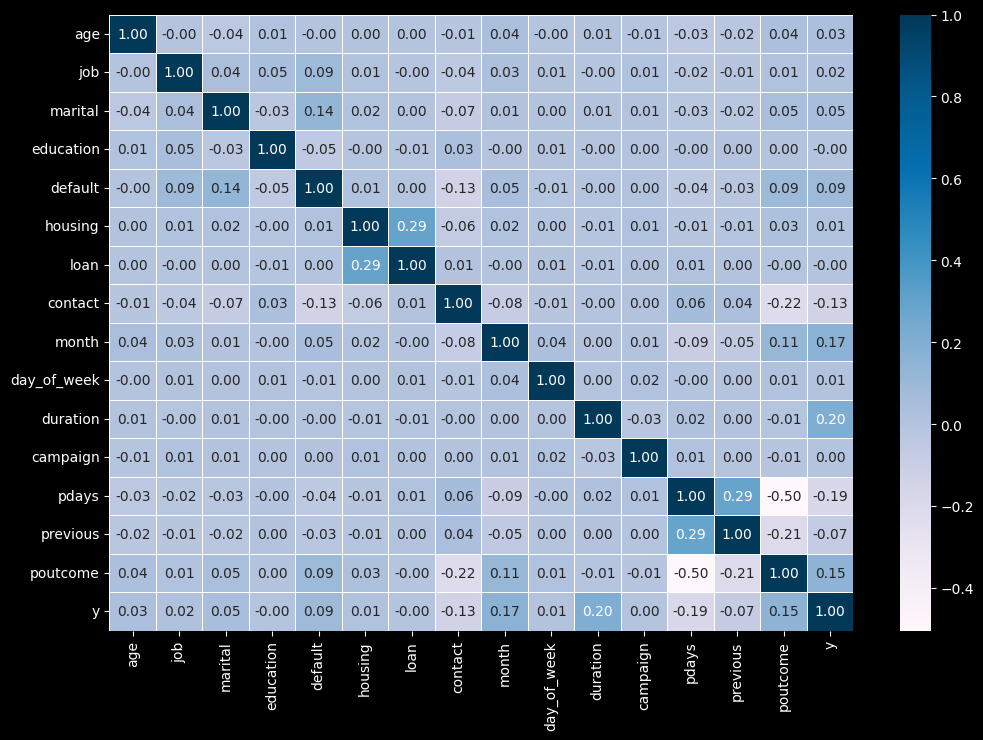

In [17]:
import seaborn as sns
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_Final.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [18]:
corr = df_Final.corr()
corr["previous"].sort_values()

poutcome      -0.205669
y             -0.071133
month         -0.051195
default       -0.027190
age           -0.022586
marital       -0.019347
job           -0.011171
housing       -0.008933
campaign       0.000269
day_of_week    0.000709
loan           0.003238
education      0.003495
duration       0.004364
contact        0.039857
pdays          0.285191
previous       1.000000
Name: previous, dtype: float64

In [19]:
dfmodel = df_Final.drop(['campaign','day_of_week'], axis = 1)
dfmodel

,age,job,marital,education,default,housing,loan,contact,month,duration,pdays,previous,poutcome,y
0,1,1,1,1,1,1,1,1,1,596,25,8,1,1
1,2,2,1,2,2,1,1,2,1,1375,25,8,2,1
2,3,3,1,3,2,1,1,1,2,1403,25,8,1,2
3,4,4,1,2,2,2,1,2,3,696,25,8,1,1
4,5,3,2,2,2,1,1,1,4,699,25,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,35,6,3,4,2,2,1,1,2,192,25,8,1,1
32946,36,7,1,5,2,2,1,1,1,807,25,8,2,1
32947,45,4,1,1,2,1,2,1,2,110,25,8,1,1
32948,6,4,1,2,2,1,1,2,3,922,25,8,1,1


### Seperate Y out, make the table contain only X variable

In [20]:
x = dfmodel.drop(['y'], axis=1)
x

,age,job,marital,education,default,housing,loan,contact,month,duration,pdays,previous,poutcome
0,1,1,1,1,1,1,1,1,1,596,25,8,1
1,2,2,1,2,2,1,1,2,1,1375,25,8,2
2,3,3,1,3,2,1,1,1,2,1403,25,8,1
3,4,4,1,2,2,2,1,2,3,696,25,8,1
4,5,3,2,2,2,1,1,1,4,699,25,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,35,6,3,4,2,2,1,1,2,192,25,8,1
32946,36,7,1,5,2,2,1,1,1,807,25,8,2
32947,45,4,1,1,2,1,2,1,2,110,25,8,1
32948,6,4,1,2,2,1,1,2,3,922,25,8,1


In [21]:
y = dfmodel['y']
y

0        1
1        1
2        2
3        1
4        1
        ..
32945    1
32946    1
32947    1
32948    1
32949    1
Name: y, Length: 31742, dtype: int64

### Check weather Y is balance or imbalance

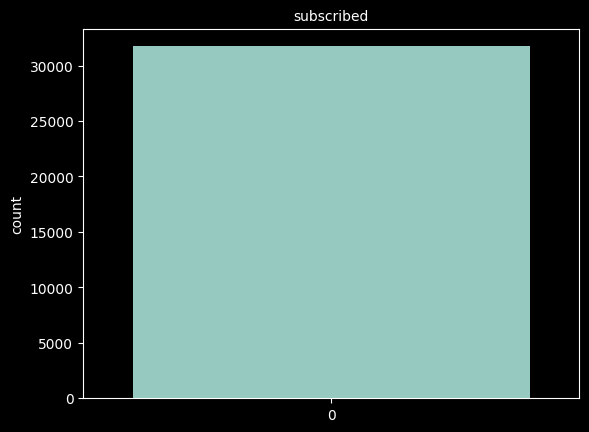

In [22]:
sns.countplot(y, palette='Set3')
plt.title("subscribed",fontsize=10)
plt.show()

No = 1, Yes = 2

### Fit transform X

In [23]:
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.39014413, -1.29163864, -0.76146972, -1.33151274, -1.91752008,
        -1.05573773, -0.4394766 , -0.76788243, -1.36772042,  0.08919312,
         0.10545224,  0.06170728, -0.35109711],
       [-1.34031369, -0.95188134, -0.76146972, -0.74066827,  0.52092078,
        -1.05573773, -0.4394766 ,  1.30228269, -1.36772042,  2.20205374,
         0.10545224,  0.06170728,  2.33627312],
       [-1.29048324, -0.61212403, -0.76146972, -0.1498238 ,  0.52092078,
        -1.05573773, -0.4394766 , -0.76788243, -0.8349984 ,  2.27799738,
         0.10545224,  0.06170728, -0.35109711],
       [-1.2406528 , -0.27236672, -0.76146972, -0.74066827,  0.52092078,
         0.79142504, -0.4394766 ,  1.30228269, -0.30227637,  0.36042042,
         0.10545224,  0.06170728, -0.35109711],
       [-1.19082235, -0.61212403,  0.36426135, -0.74066827,  0.52092078,
        -1.05573773, -0.4394766 , -0.76788243,  0.23044566,  0.36855724,
         0.10545224,  0.06170728, -0.35109711]])

In [24]:
dfmodel.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
duration     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Train-Test split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state =42)

### KNN

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

steps = [('scaler', StandardScaler()),         
         ('knn', KNeighborsClassifier(n_neighbors=3))]

knn_pipeline = Pipeline(steps)
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# ---------------------- Training ---------------------- #

# ypred_test = knn_pipeline.predict(X_train)
# mat_clf = confusion_matrix(y_train, ypred_test)
# report_clf = classification_report(y_train, ypred_test)

# print(mat_clf)
# print(report_clf)

# ypred_testP = knn_pipeline.predict_proba(X_train)
# auc = roc_auc_score(y_train, ypred_testP[:,1])
# print(auc)

# ---------------------- Testing ---------------------- #

ypred_test = knn_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = knn_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)

[[5529  217]
 [ 520   83]]
              precision    recall  f1-score   support

           1       0.91      0.96      0.94      5746
           2       0.28      0.14      0.18       603

    accuracy                           0.88      6349
   macro avg       0.60      0.55      0.56      6349
weighted avg       0.85      0.88      0.87      6349

0.6341202676719662


**Accuracy**, **precision**,**recall**, and **auc** of **KNN**

*   Training: 0.91, 0.92, 0.99, 0.9127 
*   Testing : 0.89, 0.91, 0.94, 0.6751



### Logistic Regression

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
         ('logReg', LogisticRegression(solver='liblinear', penalty='l2', C=0.01))]

clf_pipeline = Pipeline(steps) 
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logReg', LogisticRegression(C=0.01, solver='liblinear'))])

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# ---------------------- Training ---------------------- #

# ypred_test = clf_pipeline.predict(X_train)
# mat_clf = confusion_matrix(y_train, ypred_test)
# report_clf = classification_report(y_train, ypred_test)

# print(mat_clf)
# print(report_clf)

# ypred_testP = clf_pipeline.predict_proba(X_train)
# auc = roc_auc_score(y_train, ypred_testP[:,1])
# print(auc)

# ---------------------- Testing ---------------------- #

ypred_test = clf_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test)
report_clf = classification_report(y_test, ypred_test)

print(mat_clf)
print(report_clf)

ypred_testP = clf_pipeline.predict_proba(X_test)
auc = roc_auc_score(y_test, ypred_testP[:,1])
print(auc)

[[5714   32]
 [ 562   41]]
              precision    recall  f1-score   support

           1       0.91      0.99      0.95      5746
           2       0.56      0.07      0.12       603

    accuracy                           0.91      6349
   macro avg       0.74      0.53      0.54      6349
weighted avg       0.88      0.91      0.87      6349

0.7848035030786433


**Accuracy**, **precision**, **recall**, and **auc** of **Logistic Regression**


*   Training: 0.90, 0.91, 0.99, 0.7422
*   Testing : 0.90, 0.91, 0.95, 0.7308



### SVC (Linear)

In [30]:
from sklearn.svm import SVC
steps = [('scaler', StandardScaler()),
         ('svc', SVC(kernel = 'linear', C = 0.01))]
         
svc_pipeline = Pipeline(steps) 
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.01, kernel='linear'))])

In [31]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# ------------------------ Training ------------------------ #

# ypred_test = svc_pipeline.predict(X_train)
# mat_clf = confusion_matrix(y_train, ypred_test) 

# print(mat_clf)
# print(report_clf)

# report_clf = classification_report(y_train, ypred_test) 
# auc = roc_auc_score(y_train, ypred_test)   
# print(auc)

# ------------------------ Testing ------------------------ #

ypred_test = svc_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test) 

print(mat_clf)
print(report_clf)

report_clf = classification_report(y_test, ypred_test) 
auc = roc_auc_score(y_test, ypred_test)   
print(auc)

[[5727   19]
 [ 565   38]]
              precision    recall  f1-score   support

           1       0.91      0.99      0.95      5746
           2       0.56      0.07      0.12       603

    accuracy                           0.91      6349
   macro avg       0.74      0.53      0.54      6349
weighted avg       0.88      0.91      0.87      6349

0.5298557970098458


**Accuracy**, **precision**, **recall**, and **auc** of **SVC(Linear)**


*   Training: 0.90, 0.98, 0.94, 0.5969
*   Testing : 0.90, 0.91, 0.98, 0.5999

### SVC (Polynomial)

In [32]:
# from sklearn.svm import SVC

# steps = [('scaler', StandardScaler()),
#          ('svc', SVC(kernel = 'poly', degree = 23))]

# svc_pipeline = Pipeline(steps)
# svc_pipeline.fit(X_train, y_train)

In [33]:
# from sklearn.metrics import classification_report 
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_auc_score

# #--------------------- Training ------------------------

# ypred_test = svc_pipeline.predict(X_train)
# mat_clf = confusion_matrix(y_train, ypred_test) 
# report_clf = classification_report(y_train, ypred_test) 

# print(mat_clf)
# print(report_clf)

# auc = roc_auc_score(y_train, ypred_test)

# print(auc)

# #--------------------- Testing ------------------------

# # ypred_test = svc_pipeline.predict(X_test)
# # mat_clf = confusion_matrix(y_test, ypred_test) 
# # report_clf = classification_report(y_test, ypred_test) 

# # print(mat_clf)
# # print(report_clf)

# # auc = roc_auc_score(y_test, ypred_test)

# # print(auc)

**Accuracy**, **precision**, **recall**, and **auc** of **SVC(Polynomial)**


*   Training: 0.91, 0.91, 1.00, 0.5632
*   Testing : 0.90, 0.91, 0.99, 0.5258

### SVC (RBF)

In [34]:
from sklearn.svm import SVC
steps = [('scaler', StandardScaler()),
         ('svc', SVC(kernel = 'rbf', gamma = 'scale', C=1000))]

svc_pipeline = Pipeline(steps)
svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=1000))])

In [35]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

#--------------- Training --------------------------------#

# ypred_test = svc_pipeline.predict(X_train)
# mat_clf = confusion_matrix(y_train, ypred_test) 
# report_clf = classification_report(y_train, ypred_test) 

# print(mat_clf)
# print(report_clf)

# auc = roc_auc_score(y_train, ypred_test)

# print(auc)

#--------------- Testing --------------------------------#

ypred_test = svc_pipeline.predict(X_test)
mat_clf = confusion_matrix(y_test, ypred_test) 
report_clf = classification_report(y_test, ypred_test) 

print(mat_clf)
print(report_clf)

auc = roc_auc_score(y_test, ypred_test)

print(auc)

[[5538  208]
 [ 517   86]]
              precision    recall  f1-score   support

           1       0.91      0.96      0.94      5746
           2       0.29      0.14      0.19       603

    accuracy                           0.89      6349
   macro avg       0.60      0.55      0.57      6349
weighted avg       0.86      0.89      0.87      6349

0.5532105685749233


**Accuracy**, **precision**, **recall**, and **auc** of **SVC(RBF)**


*   Training: 0.91, 0.91, 1.00, 0.5390
*   Testing : 0.91, 0.91, 1.00, 0.5327